In [24]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy

# api key
#from api_keys import weather_api_key
weather_api_key = "e838885bab17c736ee6524f072d4f85a"

In [19]:
# Setup

# File to store cities
output_data_file = 'output_data/cities.csv'

# Rabge of latitude and longtitude

lat_range = (-90, 90)
lng_range = (-180, 180)

## Preparation
In this part we will be use a python library "citipy" to generate a list of cyties based on latitude and longtitude for a future analysis.

In [20]:
# List for holding lat_lngs
lat_lngs = []

# List for holding cities

cities = []

# Create a set of random lat and lng combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

In [73]:
# Get Data for each city and write it to a file
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&'
new_line = '\n'

with open('output_data_file', 'w') as f:
    f.write('City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date\n')
    
    for city in cities:
        query_url = "appid=" + weather_api_key + "&q=" + city
        requested_url = base_url + query_url
        try:
            response = requests.get(requested_url).json()
        
            f.write(f"{response['name']}, {response['coord']['lat']}, {response['coord']['lon']}, {response['main']['temp_max']}, {response['main']['humidity']}, {response['clouds']['all']}, {response['wind']['speed']}, {response['sys']['country']}, {response['dt']} {new_line}")
            print(f'Data for city {city} was gotten')
        except: 
            print(f'City {city} not found')
        

    

City taolanaro not found
Data for city areka was gotten
Data for city twentynine palms was gotten
Data for city port elizabeth was gotten
Data for city rikitea was gotten
Data for city wanning was gotten
Data for city bluff was gotten
Data for city presidencia roque saenz pena was gotten
Data for city hermanus was gotten
Data for city puerto ayora was gotten
Data for city san quintin was gotten
Data for city ribeira grande was gotten
Data for city hengshui was gotten
Data for city waingapu was gotten
Data for city kagadi was gotten
Data for city ponta delgada was gotten
City lushunkou not found
Data for city punta arenas was gotten
Data for city bathsheba was gotten
Data for city mar del plata was gotten
Data for city hofn was gotten
Data for city coquimbo was gotten
Data for city port-cartier was gotten
Data for city fortuna was gotten
Data for city bara was gotten
Data for city mataura was gotten
Data for city mabaruma was gotten
Data for city berdigestyakh was gotten
Data for city h

Data for city lavrentiya was gotten
Data for city adre was gotten
Data for city klaksvik was gotten
Data for city hasaki was gotten
Data for city calafell was gotten
Data for city jinchang was gotten
Data for city kununurra was gotten
Data for city tuktoyaktuk was gotten
Data for city samarinda was gotten
Data for city sur was gotten
Data for city saldanha was gotten
Data for city port hedland was gotten
Data for city pacific grove was gotten
Data for city xinzhi was gotten
Data for city la ronge was gotten
Data for city sistranda was gotten
City samusu not found
Data for city avarua was gotten
Data for city cserszegtomaj was gotten
Data for city port hardy was gotten
Data for city vitim was gotten
Data for city novyy urengoy was gotten
Data for city camana was gotten
Data for city cabedelo was gotten
Data for city mariestad was gotten
Data for city kaspiyskiy was gotten
Data for city santa adelia was gotten
Data for city dhidhdhoo was gotten
Data for city mitu was gotten
Data for city

Data for city djambala was gotten
City skalistyy not found
Data for city tulu bolo was gotten
Data for city englewood was gotten
Data for city bonthe was gotten
Data for city riyadh was gotten
Data for city krasnoselkup was gotten
Data for city trat was gotten
Data for city singaraja was gotten
Data for city matara was gotten
Data for city azul was gotten
Data for city samarai was gotten
Data for city ca mau was gotten
Data for city altus was gotten
Data for city lorengau was gotten
Data for city east lansing was gotten
Data for city biasong was gotten
Data for city yinchuan was gotten
Data for city le port was gotten
Data for city monrovia was gotten
Data for city cotonou was gotten
Data for city ukiah was gotten
Data for city micheweni was gotten
Data for city petropavlovsk-kamchatskiy was gotten
Data for city saint-augustin was gotten
Data for city worthing was gotten
Data for city asau was gotten
Data for city fonte boa was gotten
Data for city ust-nera was gotten
Data for city gam

In [75]:
# Read data to df
city_weather_df = pd.read_csv('output_data_file')
city_weather_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Āreka,7.07,37.70,56.80,43,30,5.82,ET,1605836099
1,Twentynine Palms,34.14,-116.05,66.20,32,1,3.36,US,1605836100
2,Port Elizabeth,-33.92,25.57,53.60,93,75,4.70,ZA,1605836101
3,Rikitea,-23.12,-134.97,70.65,78,52,30.31,PF,1605836102
4,Wanning,18.80,110.40,77.92,85,23,3.38,CN,1605835667


In [79]:
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,20.317795,15.902274,56.083750,74.569444,52.074653,7.983976,1.605836e+09
std,32.268569,90.567551,25.052956,19.121089,40.600959,6.189344,2.883731e+02
min,-54.800000,-179.170000,-18.980000,13.000000,0.000000,0.270000,1.605835e+09
25%,-3.975000,-62.602500,38.155000,66.000000,5.000000,3.360000,1.605836e+09
50%,22.535000,18.690000,64.045000,79.000000,56.500000,6.530000,1.605836e+09
75%,46.597500,97.250000,75.557500,88.000000,96.000000,11.082500,1.605836e+09
max,78.220000,179.320000,98.010000,100.000000,100.000000,50.550000,1.605837e+09


In [87]:
# rename column names to eliminate space in the column names.
city_weather_df = city_weather_df.rename(columns={'City': 'City', ' Lat': 'Lat', ' Lng': 'Lng'
                                                  , ' Max Temp': 'Max Temp', ' Humidity': 'Humidity'
                                                  , ' Cloudiness': 'Cloudiness', ' Wind Speed': 'Wind Speed'
                                                  , ' Country': 'Country' , ' Date': 'Date'})
city_weather_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

### Plotting the Data

In [89]:
temperature = city_weather_df['Max Temp']
humidity = city_weather_df['Humidity']
cloudness = city_weather_df['Cloudiness']
wind_speed = city_weather_df['Wind Speed']
latitude = city_weather_df['Lat']

**Latitude vs Temperature**

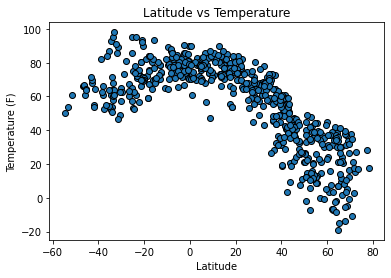

In [99]:
plt.scatter(latitude, temperature, edgecolors='black')
plt.title('Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

**Humidity vs Latitude**

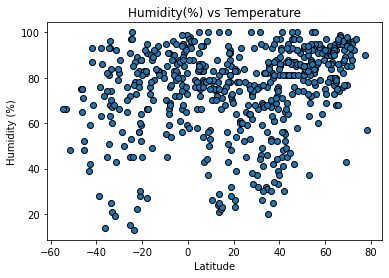

In [95]:
plt.scatter(latitude, humidity, edgecolors='black')
plt.title('Humidity(%) vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

**Cloudiness vs Latitude**

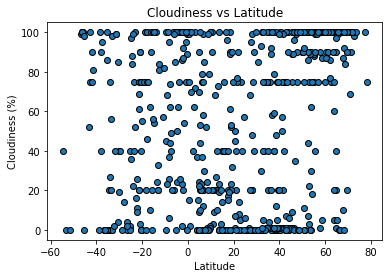

In [98]:
plt.scatter(latitude, cloudness, edgecolors='black')
plt.title('Cloudiness vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

**Wind Speed vs Latitude**

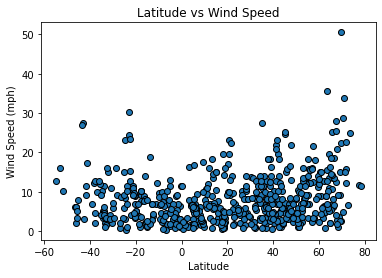

In [97]:
plt.scatter(latitude, wind_speed, edgecolors='black')
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

### Linear Regression

In [109]:
# Generate 2 df to store hemisphere data
northern_hemisphere_df = city_weather_df.loc[(city_weather_df['Lat'] > 0)]
southern_hemisphere_df = city_weather_df.loc[(city_weather_df['Lat'] < 0) ]


In [110]:
north_hemph_temp = northern_hemisphere_df['Max Temp']
north_hemph_humidity = northern_hemisphere_df['Humidity']
north_hemph_cloudiness = northern_hemisphere_df['Cloudiness']
north_hemph_wind_speed = northern_hemisphere_df['Wind Speed']
north_hemph_lat = northern_hemisphere_df['Lat']


In [111]:
southern_hemph_temp = southern_hemisphere_df['Max Temp']
southern_hemph_humidity = southern_hemisphere_df['Humidity']
southern_hemph_cloudiness = southern_hemisphere_df['Cloudiness']
southern_hemph_wind_speed = southern_hemisphere_df['Wind Speed']
southern_hemph_lat = southern_hemisphere_df['Lat']
